In [1]:
# Import required libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import hvplot.pandas


In [3]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv("Resources/crypto_market_data.csv",  index_col="coin_id")
#"Resources/crypto_market_data.csv"

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


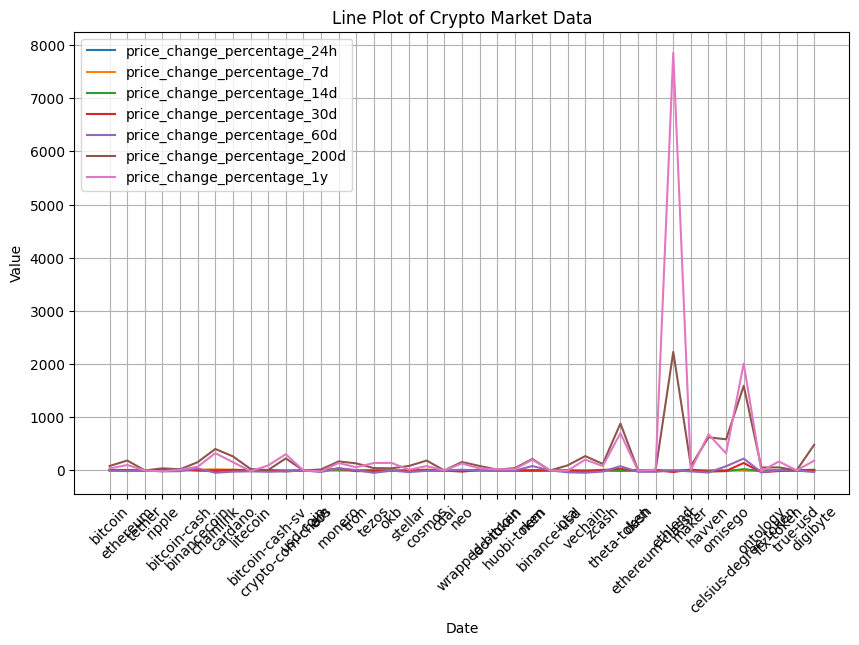

In [99]:
# Plotting the data using matplotlib
plt.figure(figsize=(10, 6))
for column in df_market_data.columns:
    plt.plot(df_market_data.index, df_market_data[column], label=column)

plt.title('Line Plot of Crypto Market Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

---

### Prepare the Data

In [13]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

# Use the StandardScaler to normalize the data.
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df_market_data)

# Convert the normalized data to a DataFrame.
df_normalized = pd.DataFrame(normalized_data, columns=df_market_data.columns, index=df_market_data.index)

# Display the normalized data.
df_normalized.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [14]:
# Copy the crypto names from the original data
crypto_names = df_market_data.index

# Set the coinid column as index
df_scaled_data = pd.DataFrame(normalized_data, columns=df_market_data.columns, index=crypto_names)

# Display sample data
df_scaled_data.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [15]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))


In [ ]:
# Create an empty list to store the inertia values


# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=42)

    # 2. Fit the model to the data using `df_market_data_scaled`
    kmeans_model.fit(df_scaled_data)

    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)

In [18]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_data = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow_data

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.220364
5,6,52.829819
6,7,43.786435
7,8,37.527740
8,9,33.070926
9,10,28.989073


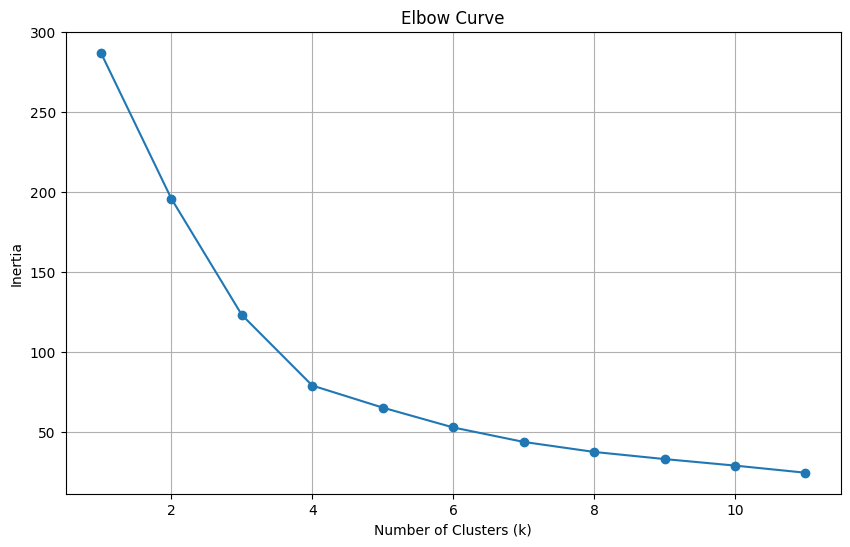

In [19]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

# Plot a line chart with all the inertia values
plt.figure(figsize=(10, 6))
plt.plot(df_elbow_data['k'], df_elbow_data['inertia'], marker='o', linestyle='-')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:** As you can see, there is a significant decrease
             in inertia from k = 1 to k=4, and the decrease becomes less pronounce for higher values of k.
             Therefore, k =4 would be the best choice according to Elbow method.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [48]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans_model = KMeans(n_clusters=best_k, random_state=42)

In [21]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(df_scaled_data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [22]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans_model.predict(df_scaled_data)

# Print the resulting array of cluster values.
print(cluster_labels)


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [23]:
# Create a copy of the DataFrame
df_clustered = df_scaled_data.copy()

In [85]:
# Add a new column to the DataFrame with the predicted clusters
df_clustered['K-Means'] = cluster_labels

# Display sample data
df_clustered.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster_label,K-Means
coin_id,,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2,2


In [102]:
df_clustered.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y', 'cluster_label', 'K-Means'],
      dtype='object')

In [103]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.


# Create a scatter plot using hvPlot
scatter_plot = df_clustered.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='K-Means',  # Color the graph points with the 'K-Means' column
    hover_cols=['coin_id'],  # Add the 'coin_id' column in the hover tooltip
    cmap='viridis',
    width=800,
    height=400,
    title='Scatter Plot of Crypto Market Data'
)

# Show the plot
scatter_plot

:NdOverlay   [K-Means]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

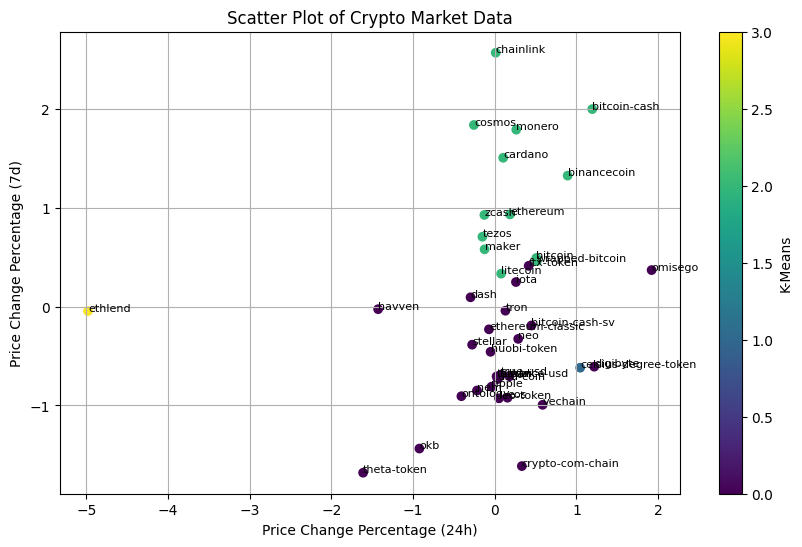

In [105]:
# Set x and y values
x = df_clustered["price_change_percentage_24h"]
y = df_clustered["price_change_percentage_7d"]

# Set colors based on K-Means labels
colors = df_clustered["K-Means"]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=colors, cmap='viridis')

# Add labels and title
plt.xlabel('Price Change Percentage (24h)')
plt.ylabel('Price Change Percentage (7d)')
plt.title('Scatter Plot of Crypto Market Data')

# Add colorbar
plt.colorbar(label='K-Means')

# Add annotations
for idx, coin_id in enumerate(df_clustered.index):
    plt.text(x[idx], y[idx], coin_id, fontsize=8)

# Show the plot
plt.grid(True)
plt.show()


---

### Optimize Clusters with Principal Component Analysis.

In [29]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [30]:
# Use the PCA model with `fit_transform` to reduce to three principal components
pca_components = pca_model.fit_transform(df_scaled_data)

# View the first five rows of the transformed DataFrame
print(pca_components[:5])

[[-0.60066733  0.84276006  0.46159457]
 [-0.45826071  0.45846566  0.95287678]
 [-0.43306981 -0.16812638 -0.64175193]
 [-0.47183495 -0.22266008 -0.47905316]
 [-1.15779997  2.04120919  1.85971527]]


In [31]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.

explained_variance = pca_model.explained_variance_ratio_

# Print the explained variance for each principal component
for i, var in enumerate(explained_variance):
    print(f"Explained variance for Principal Component {i+1}: {var:.2%}")


Explained variance for Principal Component 1: 37.20%
Explained variance for Principal Component 2: 34.70%
Explained variance for Principal Component 3: 17.60%


In [35]:
import numpy as np

# Retrieve the loadings from the PCA model
loadings = pca_model.components_

# Calculate the absolute loadings
absolute_loadings = np.abs(loadings)

# Find the index of the most important feature for each principal component
most_important_features = np.argmax(absolute_loadings, axis=1)

# Print the most important feature for each principal component
for component, feature_idx in enumerate(most_important_features):
    feature_name = df_scaled_data.columns[feature_idx]
    print(f"Component {component+1}: Most important feature is {feature_name}")


Component 1: Most important feature is price_change_percentage_200d
Component 2: Most important feature is price_change_percentage_30d
Component 3: Most important feature is price_change_percentage_7d


In [38]:
# Calculate the explained variance
pca_model.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total variance explained by the three principal components is approximately 89.50%

In [39]:

# Creating a DataFrame with the PCA data
df_pca = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original data
df_pca['coin_id'] = df_scaled_data.index

# Set the coinid column as index
df_pca.set_index('coin_id', inplace=True)

# Display sample data
df_pca.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [41]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))


In [42]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=42)

    # 2. Fit the model to the data using `df_pca`
    kmeans_model.fit(df_pca)

    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [51]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow_pca


,k,inertia
0,1,256.874086
1,2,168.811896
2,3,93.774626
3,4,49.665497
4,5,37.878747
5,6,27.618972
6,7,21.182776
7,8,17.091637
8,9,13.667065
9,10,10.559358


In [52]:
df_elbow_data

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.220364
5,6,52.829819
6,7,43.786435
7,8,37.527740
8,9,33.070926
9,10,28.989073


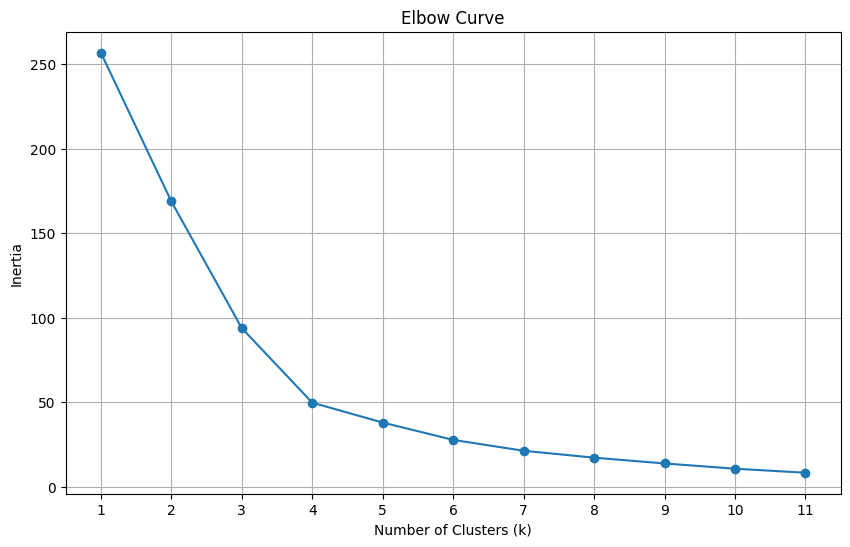

In [53]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
# Plot a line chart
plt.figure(figsize=(10, 6))
plt.plot(df_elbow_pca['k'], df_elbow_pca['inertia'], marker='o', linestyle='-')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(df_elbow['k'])
plt.grid(True)
plt.show()

#### Answer the following questions:

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k when using the PCA data appears to be k =3, as it corresponds to the point where the inertia starts to decrease at a slower rate.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**Yes, it differs. When using the original data, the best k value was determined to be k=4.
Therefore, there is a difference in the optimal k value between the two approaches.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [54]:
# Initialize the K-Means model using the best value for k
best_k = 3  # Best value for k obtained from the PCA data
kmeans_model = KMeans(n_clusters=best_k, random_state=42)

In [55]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(df_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [57]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_values = kmeans_model.predict(df_pca)
# Print the resulting array of cluster values.
print(cluster_values)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1
 0 0 0 0]


In [59]:
# Create a copy of the DataFrame with the PCA data
df_pca_copy = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_copy['cluster'] = cluster_values

# Display sample data
df_pca_copy.head()

,PC1,PC2,PC3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [64]:
# Create a scatter plot  by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

# Scatter plot with hover tooltip
scatter_plot = df_pca_copy.hvplot.scatter(x='PC1', y='PC2', by='cluster',
                                          hover_cols=['coin_id'],
                                          title='PCA Scatter Plot',
                                          xlabel='PC1', ylabel='PC2')

# Show the plot
scatter_plot


:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

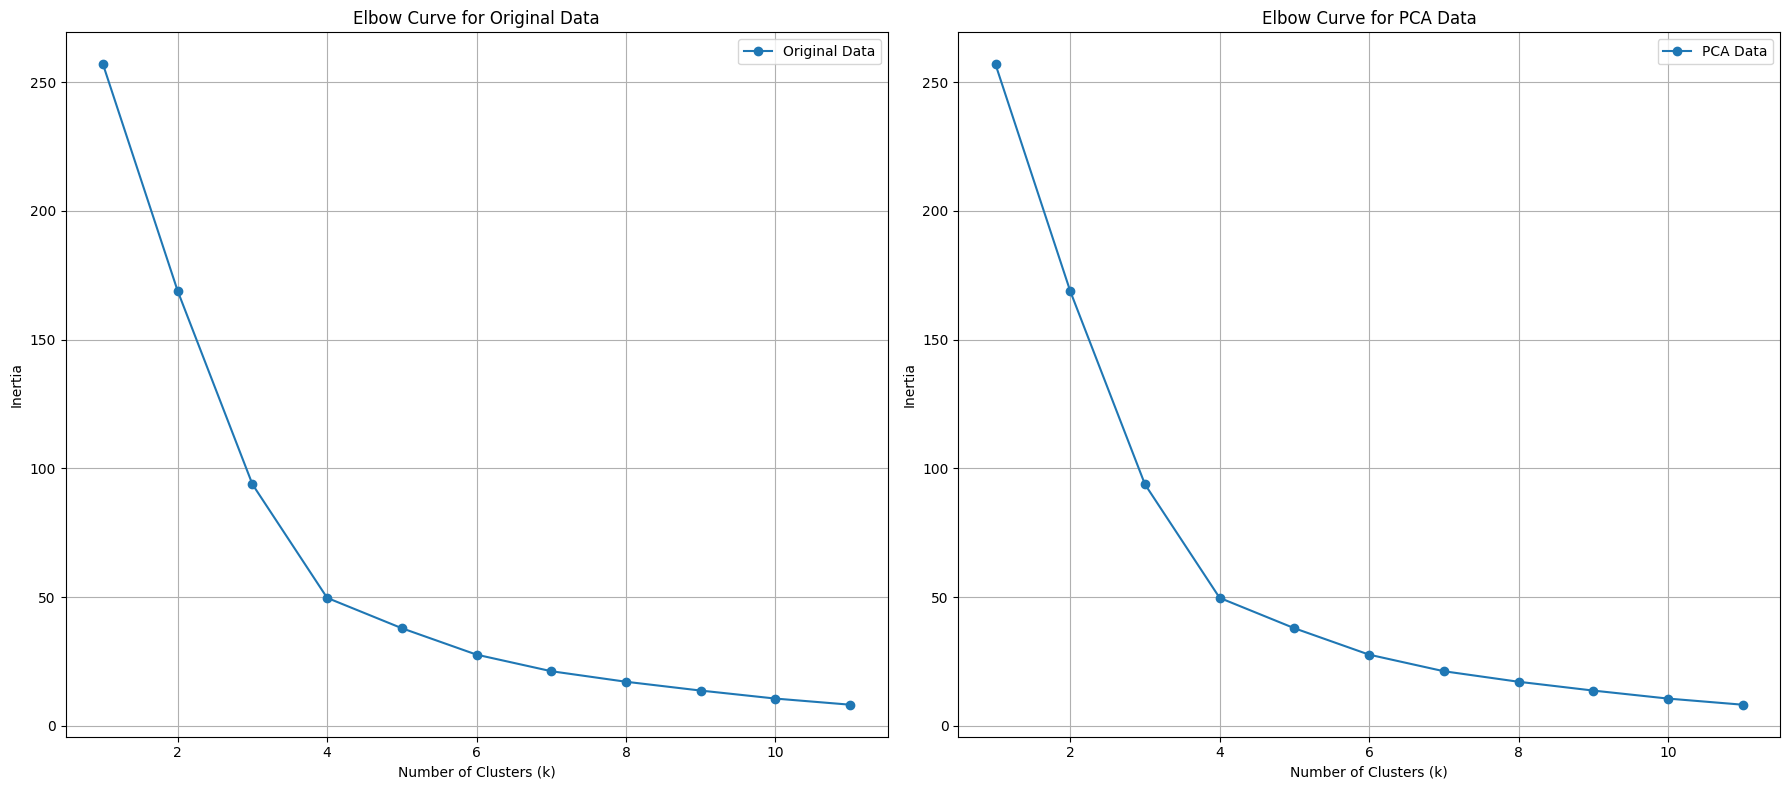

In [109]:
# Composite plot to contrast the Elbow curves
plt.figure(figsize=(18, 8))

# Plot the Elbow curve for original data
plt.subplot(1, 2, 1)
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o', label='Original Data')
plt.title('Elbow Curve for Original Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.legend()

# Plot the Elbow curve for PCA data
plt.subplot(1, 2, 2)
plt.plot(df_elbow_pca['k'], df_elbow_pca['inertia'], marker='o', label='PCA Data')
plt.title('Elbow Curve for PCA Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()



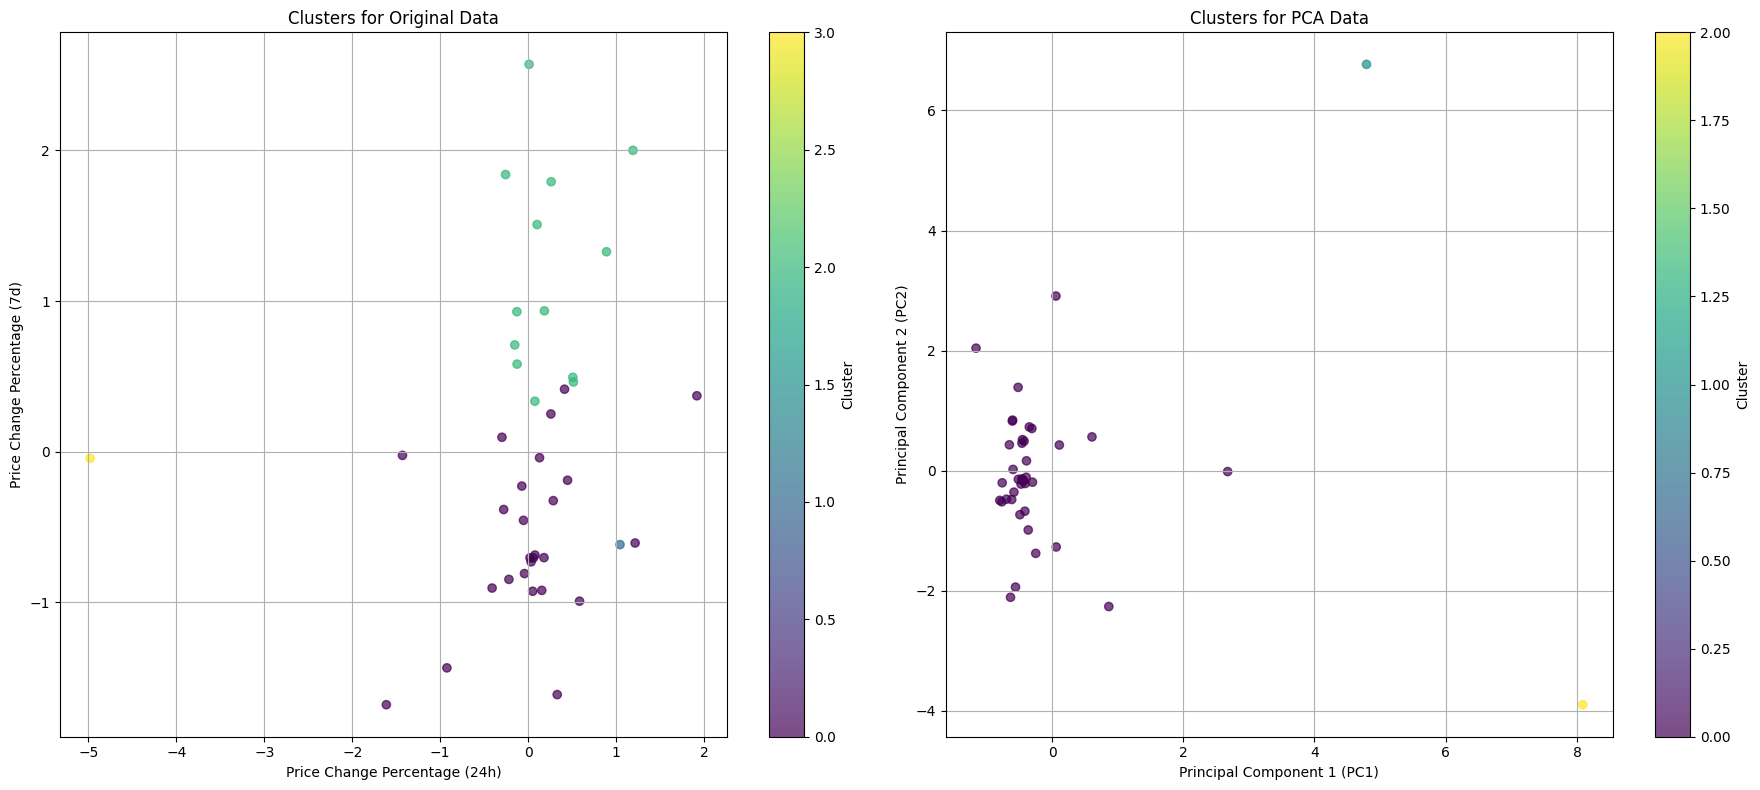

In [110]:
# Composite plot to contrast the clusters

plt.figure(figsize=(18, 8))

# Plot the clusters for original data
plt.subplot(1, 2, 1)
plt.scatter(df_clustered['price_change_percentage_24h'], df_clustered['price_change_percentage_7d'],
            c=df_clustered['K-Means'], cmap='viridis', alpha=0.7)
plt.title('Clusters for Original Data')
plt.xlabel('Price Change Percentage (24h)')
plt.ylabel('Price Change Percentage (7d)')
plt.colorbar(label='Cluster')
plt.grid(True)

# Plot the clusters for PCA data
plt.subplot(1, 2, 2)
plt.scatter(df_pca_copy['PC1'], df_pca_copy['PC2'], c=df_pca_copy['cluster'], cmap='viridis', alpha=0.7)
plt.title('Clusters for PCA Data')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.colorbar(label='Cluster')
plt.grid(True)

plt.tight_layout()
plt.show()



#### Answer the following question:

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**
  Dimensionality Reduction: PCA reduces the dimensionality of data by projecting original features onto a lower-dimensional space. This simplifies the data and helps uncover hidden patterns.

  Interpretability: With fewer features, clustering results become more interpretable. PCA generates principal components representing combinations of features with the most variance, making clusters easier to understand.

  Performance Improvement: Clustering with fewer features can enhance computational efficiency and clustering quality. Focusing on important features reduces computational overhead while yielding better clustering outcomes.

  In summary, reducing features, especially through PCA, simplifies clustering, making it easier to interpret and improving performance. However, it's essential to balance dimensionality reduction with retaining critical information